In [114]:
import pandas as pd 

Data_train = pd.read_csv('C:\\Users\\shaima.tilouche\\Documents\\CostaRicaPoverty\\data\\train.csv')
Data_test = pd.read_csv('C:\\Users\\shaima.tilouche\\Documents\\CostaRicaPoverty\\data\\test.csv')

Data_train.describe()



,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
count,2.697000e+03,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,2215.000000,9557.000000,9557.000000,...,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000
mean,1.652316e+05,0.038087,4.955530,0.023648,0.994768,0.957623,0.231767,1.404063,0.385895,1.559171,...,74.222769,1643.774302,19.132887,53.500262,3.844826,3.249485,3.900409,102.588867,1643.774302,3.302292
std,1.504571e+05,0.191417,1.468381,0.151957,0.072145,0.201459,0.421983,0.763131,0.680779,1.036574,...,76.777549,1741.197050,18.751395,78.445804,6.946296,4.129547,12.511831,93.516890,1741.197050,1.009565
min,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,1.000000
25%,8.000000e+04,0.000000,4.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,16.000000,289.000000,9.000000,0.000000,0.000000,1.000000,0.111111,36.000000,289.000000,3.000000
50%,1.300000e+05,0.000000,5.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,36.000000,961.000000,16.000000,36.000000,1.000000,2.250000,0.444444,81.000000,961.000000,4.000000
75%,2.000000e+05,0.000000,6.000000,0.000000,1.000000,1.000000,0.000000,2.000000,1.000000,2.000000,...,121.000000,2601.000000,25.000000,81.000000,4.000000,4.000000,1.777778,134.560010,2601.000000,4.000000
max,2.353477e+06,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,6.000000,5.000000,8.000000,...,441.000000,9409.000000,169.000000,441.000000,81.000000,36.000000,64.000000,1369.000000,9409.000000,4.000000


In [2]:
Data_train.groupby('Target').describe()
Data_train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


### Data preprocessing

In [3]:
###edjefa
num_temp = Data_train[Data_train['edjefa'].str.isnumeric()==True]['edjefa']
num_temp2 = pd.to_numeric(num_temp)
mean_educ = num_temp2[num_temp2>0].mean()

mean_educ

8.476365868631062

In [4]:

#Variable where we have a mix of int and categorical values such as year of education
#no means 0 years, yes means that the person went to school however it doesn't give any information about the number of years. So one approach is to replace yes by the mean of scholarity years

dict_year={'no':0, 'yes':mean_educ}
Data_train['edjefa'] = pd.to_numeric(Data_train['edjefa'].replace(dict_year))


In [5]:
###edjefe
###edjefa
num_temp_men = Data_train[Data_train['edjefe'].str.isnumeric()==True]['edjefe']
num_temp_men2 = pd.to_numeric(num_temp_men)
mean_educ_men = num_temp_men2[num_temp_men2>0].mean()


In [6]:
#Variable where we have a mix of int and categorical values such as year of education
#no means 0 years, yes means that the person went to school however it doesn't give any information about the number of years. So one approach is to replace yes by the mean of scholarity years

dict_year_men={'no':0, 'yes':mean_educ_men}
Data_train['edjefe'] = pd.to_numeric(Data_train['edjefe'].replace(dict_year_men))


In [7]:
# we can also check the correlation matrix
for i in range(1,Data_train.shape[1]):
        if Data_train.iloc[:,i].dtypes != 'float64' and Data_train.iloc[:,i].dtypes != 'int64':
            print(Data_train.columns[i])

idhogar
dependency


In [8]:
###edjefa
dep_temp = Data_train[Data_train['dependency'].str.isnumeric()==True]['dependency']
dep_temp2 = pd.to_numeric(dep_temp)
mean_dep = dep_temp2[dep_temp2>0].mean()

mean_dep


3.901016949152542

In [9]:
#Variable where we have a mix of int and categorical values such as year of education
#no means 0 years, yes means that the person went to school however it doesn't give any information about the number of years. So one approach is to replace yes by the mean of scholarity years

dict_dep={'no':0, 'yes':mean_dep}
Data_train['dependency'] = pd.to_numeric(Data_train['dependency'].replace(dict_dep))


In [10]:
# we can also check the correlation matrix
for i in range(1,Data_train.shape[1]):
        if Data_train.iloc[:,i].dtypes != 'float64' and Data_train.iloc[:,i].dtypes != 'int64':
            print(Data_train.columns[i])

idhogar


In [11]:
Data_clean = Data_train.drop({'Id','idhogar'}, axis=1)
# we can also check the correlation matrix
for i in range(0,Data_clean.shape[1]):
        if Data_clean.iloc[:,i].dtypes != 'float64' and Data_clean.iloc[:,i].dtypes != 'int64':
            print(Data_clean.columns[i])


###### Preprocessing test data

In [115]:
Data_test['dependency'] = pd.to_numeric(Data_test['dependency'].replace(dict_dep))
Data_test['edjefa'] = pd.to_numeric(Data_test['edjefa'].replace(dict_year))
Data_test['edjefe'] = pd.to_numeric(Data_test['edjefe'].replace(dict_year_men))

Data_test.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,...,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,...,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,...,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,...,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,...,18,121,324,1,0,1,0.25,64.00,NaN,324


In [116]:
# we can also check the correlation matrix
for i in range(1,Data_test.shape[1]):
        if Data_test.iloc[:,i].dtypes != 'float64' and Data_test.iloc[:,i].dtypes != 'int64':
            print(Data_test.columns[i])

idhogar


In [117]:
Data_test=Data_test.drop(['Id', 'idhogar'], axis=1)

### Visualization/ Exploration

In [112]:
Data_clean.head()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,190000.000000,0,3,0,1,1,0,1.404063,0,1,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,135000.000000,0,4,0,1,1,1,1.000000,0,1,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,165231.606971,0,8,0,1,1,0,1.404063,0,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,180000.000000,0,5,0,1,1,1,1.000000,0,2,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,180000.000000,0,5,0,1,1,1,1.000000,0,2,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [13]:
from matplotlib import pyplot
import matplotlib.pyplot as plt

import seaborn as sns

plt.hist(Data_clean[Data_clean['Target']==1]['r4t3'],bins=10, normed=True, alpha=0.6, color='r')
plt.hist(Data_clean[Data_clean['Target']==2]['r4t3'],bins=10, normed=True, alpha=0.5, color='orange')
plt.hist(Data_clean[Data_clean['Target']==3]['r4t3'],bins=10, normed=True, alpha=0.4, color='b')
plt.hist(Data_clean[Data_clean['Target']==4]['r4t3'],bins=10, normed=True, alpha=0.3, color='g')


C:\Users\shaima.tilouche\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\shaima.tilouche\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\shaima.tilouche\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\shaima.tilouche\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg

(array([0.18421372, 0.2363697 , 0.24319243, 0.13463521, 0.06276912,
        0.02653284, 0.00606465, 0.00409364, 0.00606465, 0.00515495]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <a list of 10 Patch objects>)

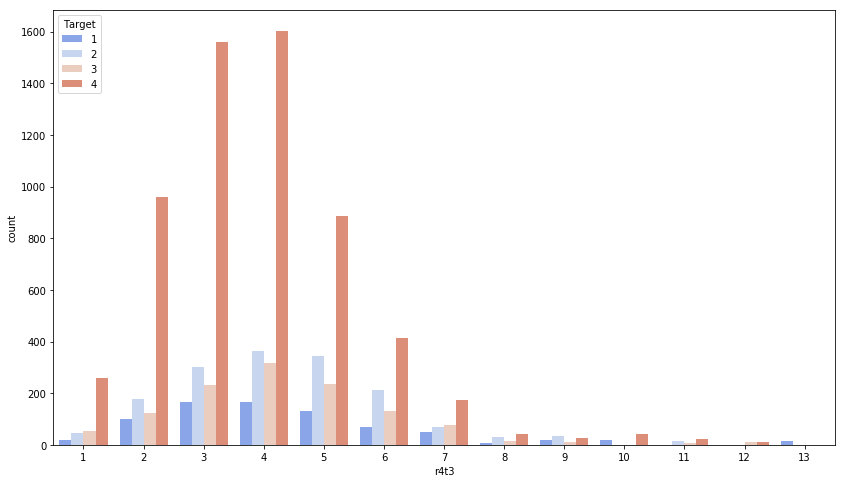

In [14]:
import seaborn as sns

plt.figure(figsize = (14, 8), facecolor = None)

mplot = sns.countplot('r4t3', data=Data_clean, hue='Target', palette='coolwarm')

This variale, Total persons in household, doesn't seem to seperate the data. Its behaviour from a class to another seems to be similar.

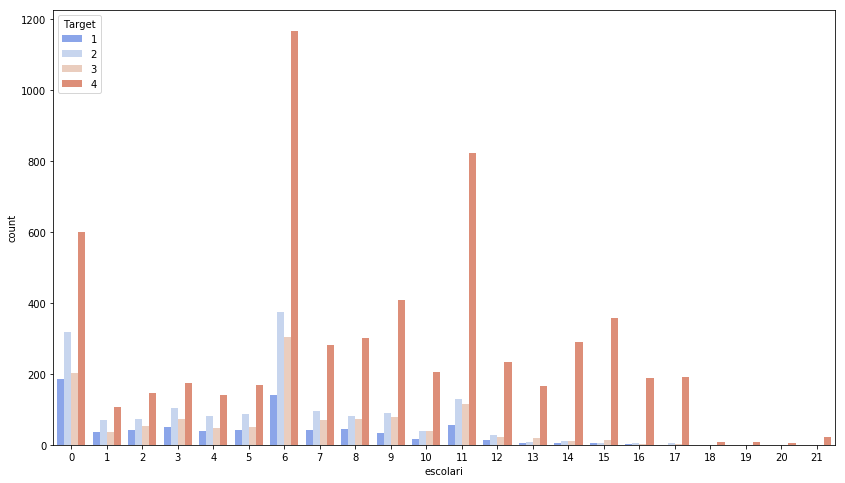

In [15]:
plt.figure(figsize = (14, 8), facecolor = None)

mplot = sns.countplot('escolari', data=Data_clean, hue='Target', palette='coolwarm')

#### Test visualizing some variables using scatterplot matrix

C:\Users\shaima.tilouche\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


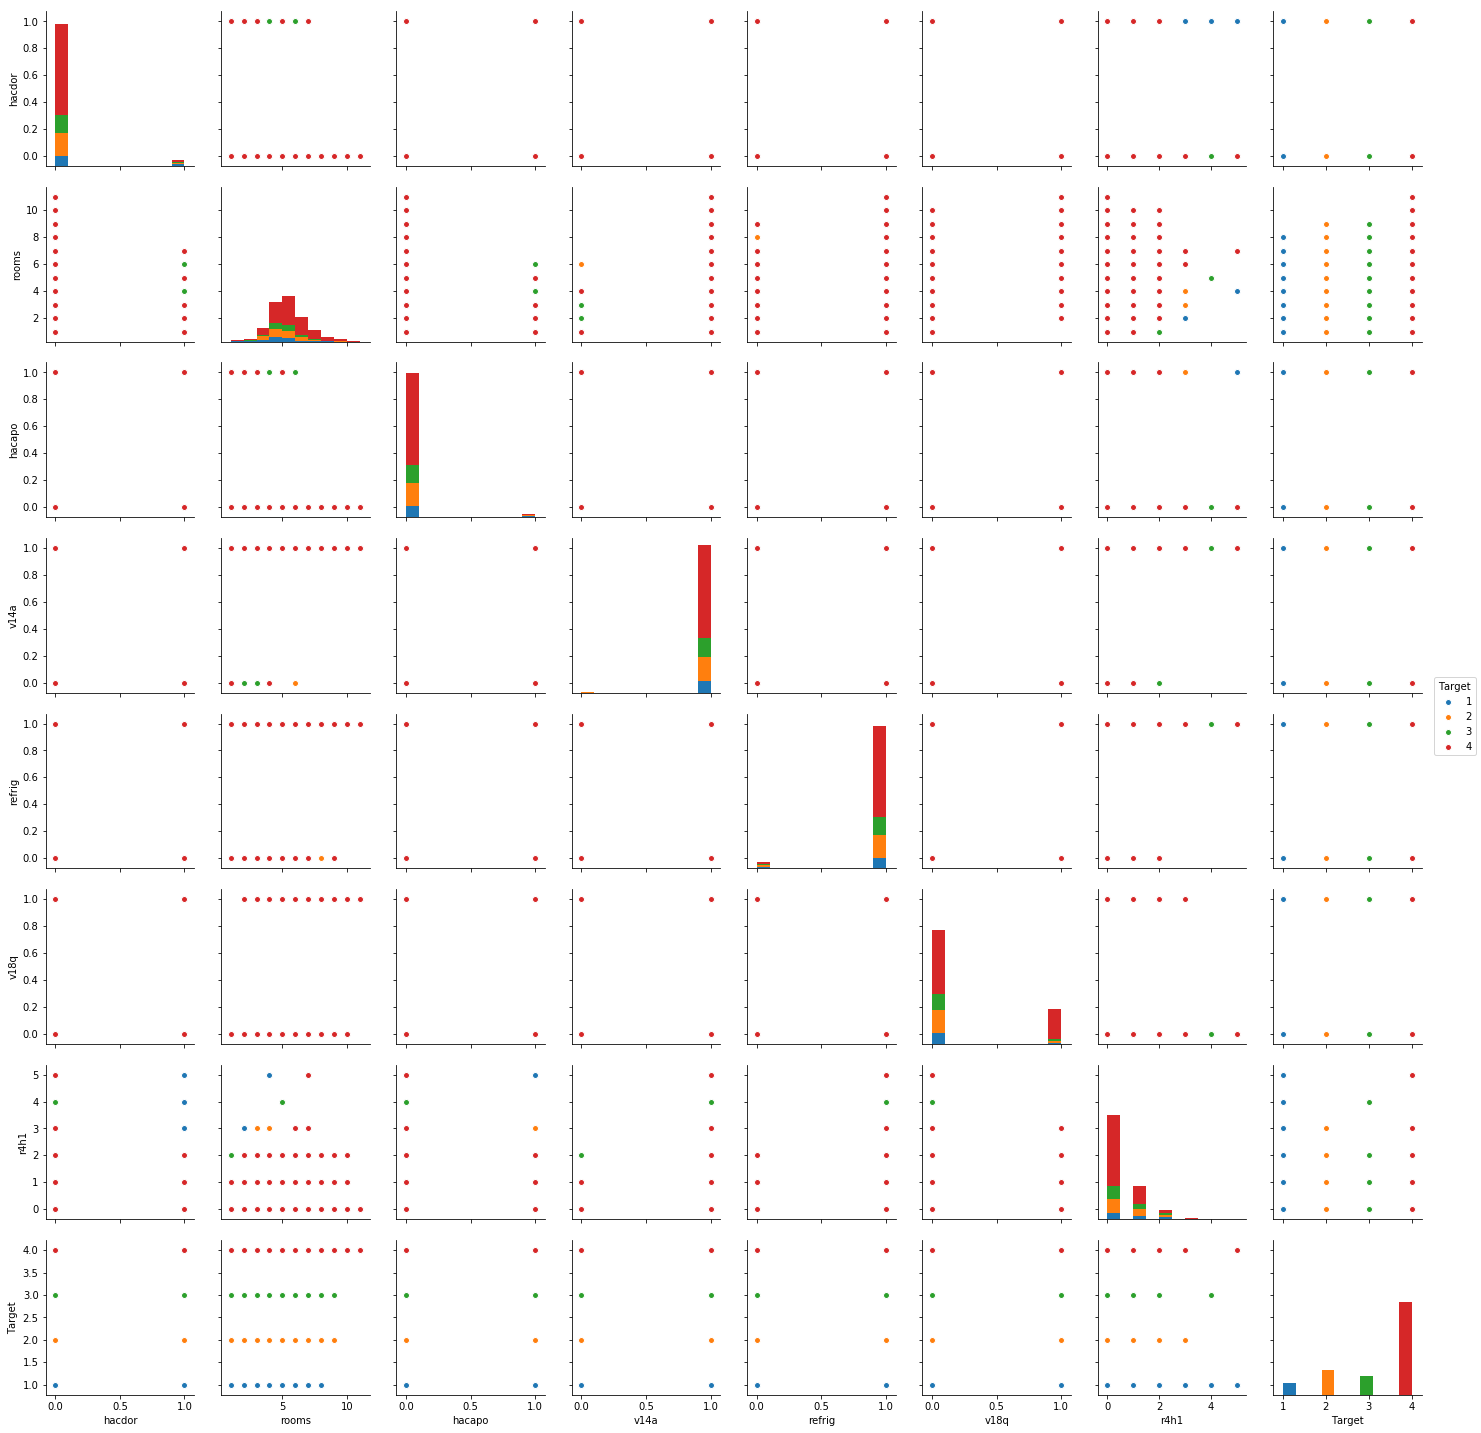

In [16]:
sns.pairplot(Data_clean.ix[:,[1,2,3,4,5,6,8, (Data_clean.shape[1]-1)]], hue='Target')


C:\Users\shaima.tilouche\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


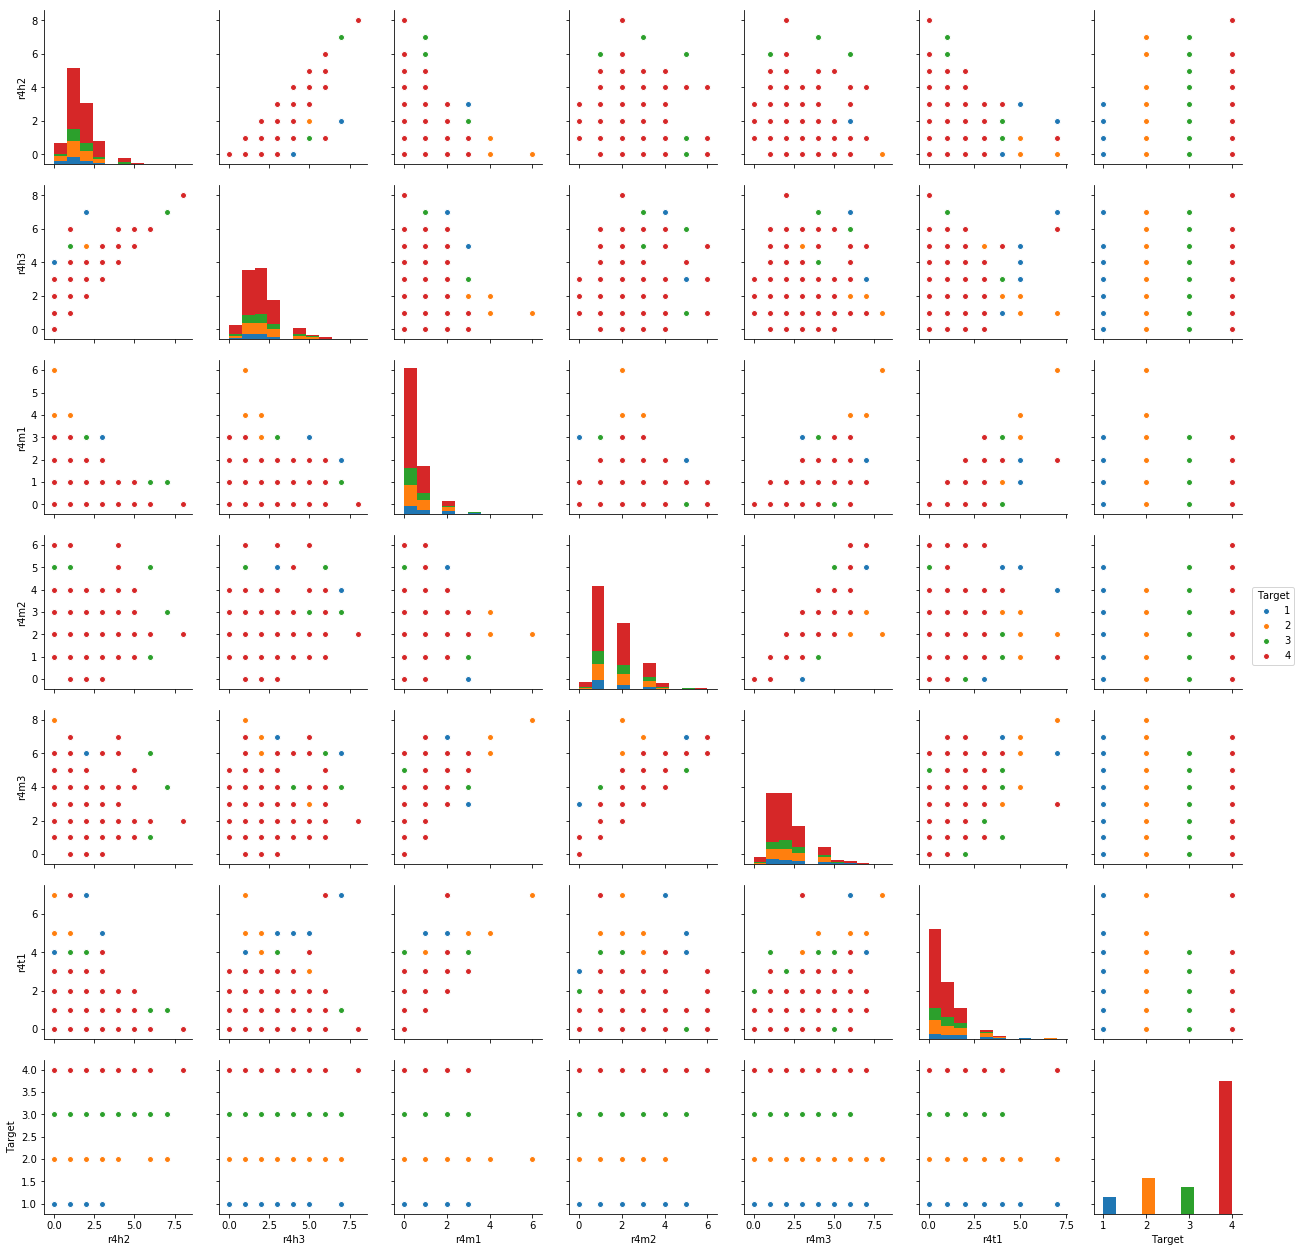

In [17]:
sns.pairplot(Data_clean.ix[:,[9,10,11,12,13,14, (Data_clean.shape[1]-1)]], hue='Target')


#### We need to preprocess data, so we need to replace missing values. One solution is to replace them by the means. We are trying it out

In [18]:
Data_clean.head()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,190000.0,0,3,0,1,1,0,NaN,0,1,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,135000.0,0,4,0,1,1,1,1.0,0,1,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,NaN,0,8,0,1,1,0,NaN,0,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,180000.0,0,5,0,1,1,1,1.0,0,2,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,180000.0,0,5,0,1,1,1,1.0,0,2,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [56]:
from pandas import DataFrame
import multiprocessing as mp

# Define an output queue

def find_replace_nan(Data, i):
    if Data.ix[:,i].dtypes=='int64':
        Data.ix[Data.ix[:,i].isna(),i] = round(Data.ix[:,i].mean())
    elif Data.ix[:,i].dtypes=='float64':
        Data.ix[Data.ix[:,i].isna(),i] = Data.ix[:,i].mean()
    return Data.ix[:,i]
test=DataFrame([])
for i in range(Data_clean.shape[1]):
    test[Data_clean.columns[i]]=find_replace_nan(Data_clean, i)
#pool = mp.Pool(processes=4)
#results = [pool.apply(find_replace_nan, args=(Data_clean, x)) for x in range(0,7)]
#print(results)    


C:\Users\shaima.tilouche\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys
C:\Users\shaima.tilouche\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':
C:\Users\shaima.tilouche\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.htm

In [60]:
Data_clean = test
Data_clean.head()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,190000.000000,0,3,0,1,1,0,1.404063,0,1,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,135000.000000,0,4,0,1,1,1,1.000000,0,1,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,165231.606971,0,8,0,1,1,0,1.404063,0,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,180000.000000,0,5,0,1,1,1,1.000000,0,2,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,180000.000000,0,5,0,1,1,1,1.000000,0,2,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [79]:
Data_clean.head()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,190000.000000,0,3,0,1,1,0,1.404063,0,1,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,135000.000000,0,4,0,1,1,1,1.000000,0,1,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,165231.606971,0,8,0,1,1,0,1.404063,0,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,180000.000000,0,5,0,1,1,1,1.000000,0,2,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,180000.000000,0,5,0,1,1,1,1.000000,0,2,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [81]:
n_col = Data_clean.shape[1]

Data2 = Data_clean.drop('Target', axis=1)

from sklearn import preprocessing
X_stand = DataFrame(preprocessing.scale(Data2), columns=Data2.columns)

X_stand['Target'] = Data_clean['Target']

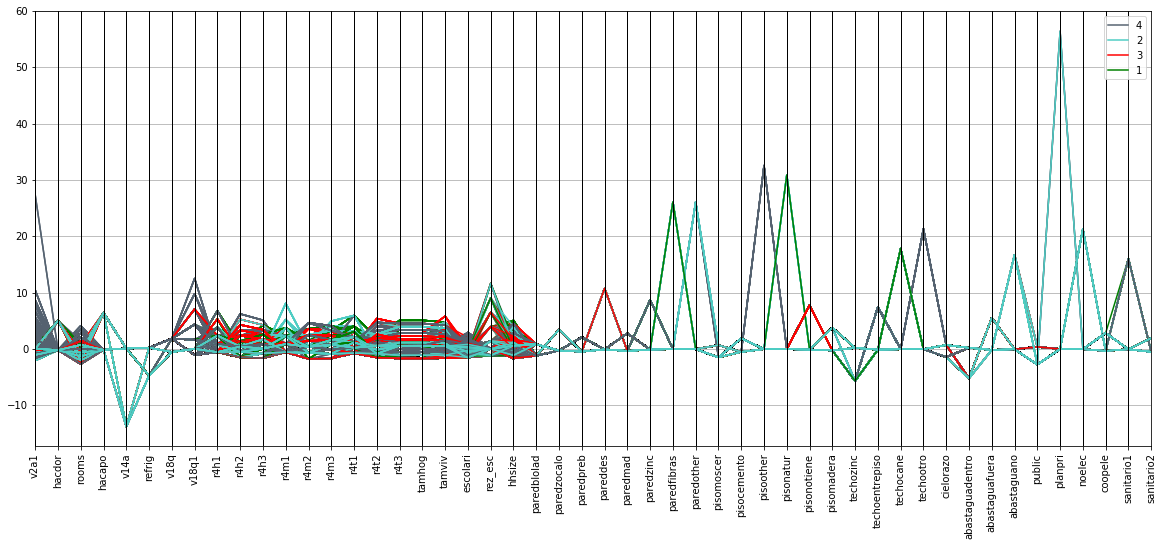

In [82]:
from pandas.plotting import parallel_coordinates

plt.figure(figsize = (20, 8))

parallel_coordinates(X_stand.iloc[:,0:50].join(X_stand['Target']), 'Target', color=('#556270','#4ECDC4', 'red', 'green') )

plt.xticks(rotation=90)

plt.show()

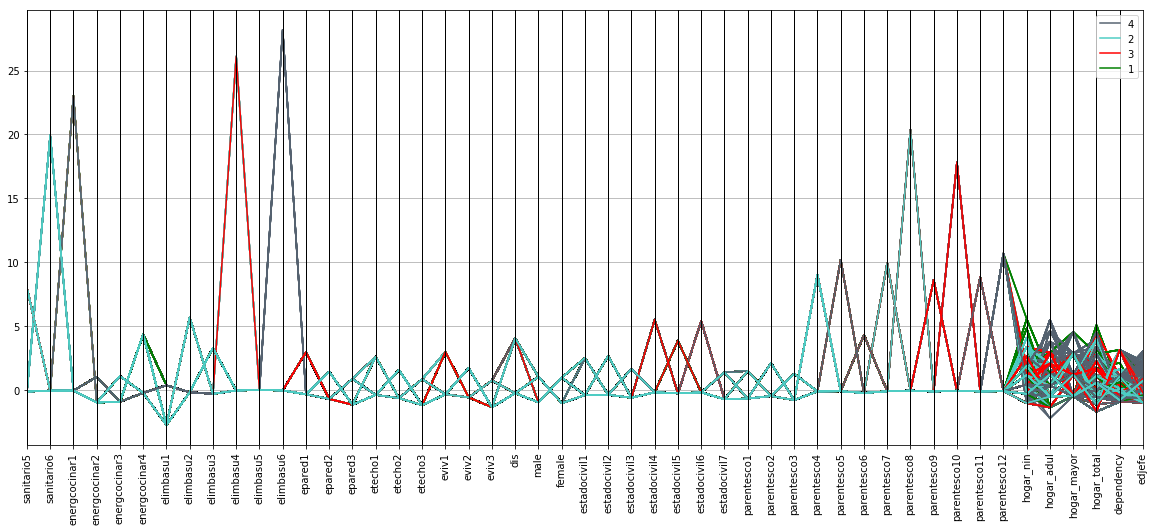

In [83]:
plt.figure(figsize = (20, 8))

parallel_coordinates(X_stand.iloc[:,51:100].join(X_stand['Target']), 'Target', color=('#556270','#4ECDC4', 'red', 'green') )

plt.xticks(rotation=90)

plt.show()

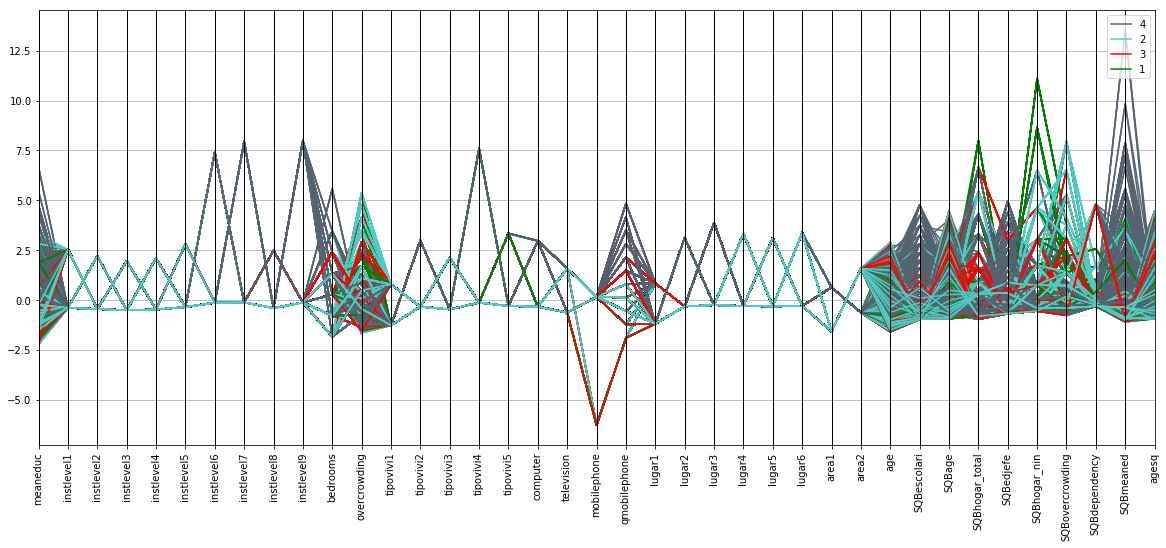

In [84]:
plt.figure(figsize = (20, 8))

parallel_coordinates(X_stand.iloc[:,101:140].join(X_stand['Target']), 'Target', color=('#556270','#4ECDC4', 'red', 'green') )

plt.xticks(rotation=90)

plt.show()

According to parallel coordinate graphs, one can see that some variables separate the data according to the classes. For classification purpose, we are trying different approaches, 
1. PCA, then classification algorithms
2. MI then classification algorithms
3. Feature selection technique and clasification algorithms

##### PCA OR LDA

In [97]:

# we need to use PCA for example to reduce dimentionality
from sklearn.decomposition import PCA
pca = PCA()
pca_comp = PCA().fit(Data_clean)
projected = pca.fit_transform(Data_clean)
#principalDf = pd.DataFrame(data = principalComponents)

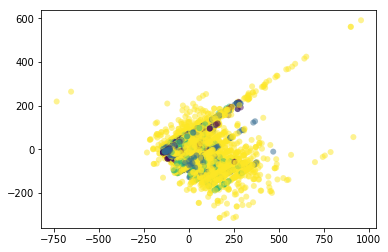

In [98]:
plt.scatter(projected[:,2], projected[:,3], c=Data_clean['Target'], edgecolor='none', alpha=0.5)

Text(0,0.5,'cumulative explained variance')

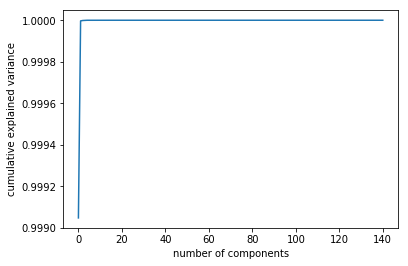

In [100]:
import numpy as np
plt.plot(np.cumsum(pca_comp.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

PCA explain the variance of the Data, so it might be not interesting for classification issue, let's try LDA in this case

In [118]:

# Applying Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components = 2)
X_train = lda.fit_transform(Data2, Data_clean['Target'])
X_test = lda.transform(Data_test)

C:\Users\shaima.tilouche\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

#### NAN pour le test data